In [3]:
import pandas as pd

carsdata = pd.read_csv("datasets/datasets/mtcars.csv")

In [4]:
carsdata.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [6]:
from sklearn.cluster import KMeans
carsdata.columns

Index([u'Unnamed: 0', u'mpg', u'cyl', u'disp', u'hp', u'drat', u'wt', u'qsec',
       u'vs', u'am', u'gear', u'carb'],
      dtype='object')

In [7]:
X = carsdata[['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]

In [8]:
#import standard Scaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )


In [9]:
#set the number of cluser range assumption
cluster_range = range( 1, 20 )
cluster_errors = []

In [10]:
#run the algo to get the clustering done
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [11]:
#create a data frame to check the number of cluster and corresponding error
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,cluster_errors,num_clusters
0,352.000000,1
1,184.858160,2
2,132.863932,3
3,89.619641,4
4,73.353567,5
5,60.618293,6
6,51.309902,7
7,43.369503,8
8,37.302118,9
9,29.910990,10


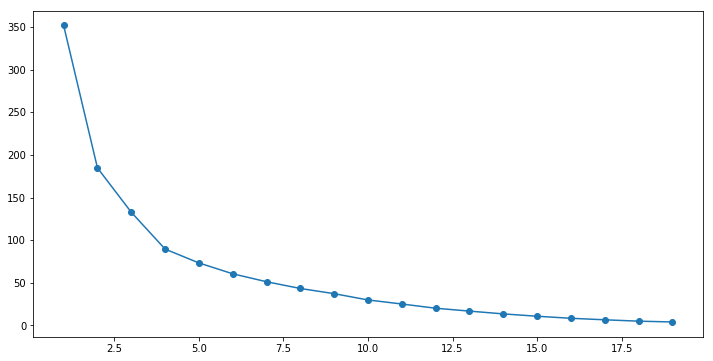

In [12]:
#plot the eblow curve to visuvalize the results
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )


In [16]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(X)
model.labels_
 

array([1, 1, 1, 2, 3, 2, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2,
       0, 3, 1, 1, 1, 0, 1, 0, 1], dtype=int32)

In [24]:
# View the results
# Set the size of the plot
plt.figure(figsize=(24,14))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black','green'])

In [22]:
# Plot the Models Classifications
predY = np.choose(model.labels_, [1, 0, 2,3]).astype(np.int64)
print (model.labels_)
print (predY)


[1 1 1 2 3 2 0 1 1 1 1 2 2 2 3 3 3 1 1 1 1 2 2 0 3 1 1 1 0 1 0 1]
[0 0 0 2 3 2 1 0 0 0 0 2 2 2 3 3 3 0 0 0 0 2 2 1 3 0 0 0 1 0 1 0]


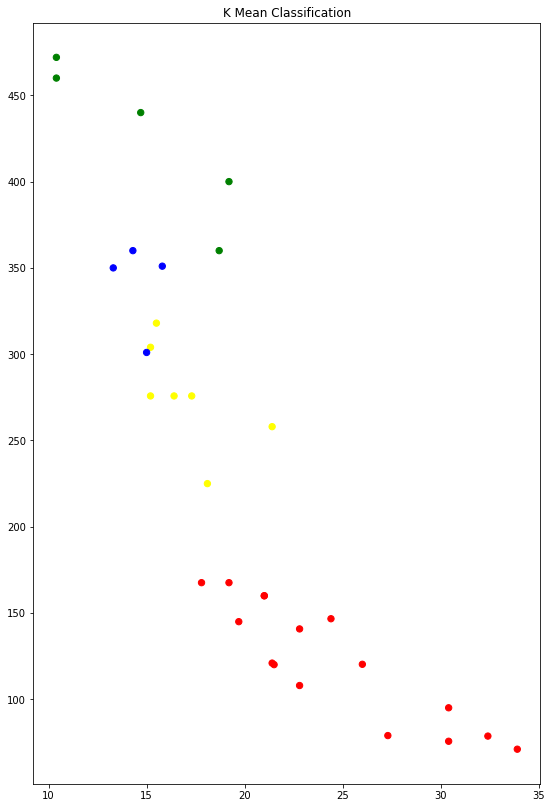

In [30]:
# View the results
# Set the size of the plot
plt.figure(figsize=(20,14))
 
# Create a colormap
colormap = np.array(['red', 'blue', 'yellow','green'])
plt.subplot(1, 2, 2)
plt.scatter(X.mpg,X.disp, c=colormap[predY], s=40)
plt.title('K Mean Classification')